## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  92.905724  1491.537602  0.209505   9.816655  325.908122
1  86.849089   486.128481  0.696487   5.219495  349.688469
2  71.664281  1465.732279  0.277242   5.354923  412.964383
3  56.774920  1587.407578  0.503573  10.205876  801.423706
4  25.517506   471.558656  0.345292   4.761804  164.725038


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0290854	total: 56.7ms	remaining: 56.7s
1:	learn: 1.0190715	total: 57.4ms	remaining: 28.6s
2:	learn: 1.0076164	total: 57.9ms	remaining: 19.2s
3:	learn: 0.9979063	total: 58.3ms	remaining: 14.5s
4:	learn: 0.9846085	total: 58.7ms	remaining: 11.7s
5:	learn: 0.9743131	total: 59.2ms	remaining: 9.81s
6:	learn: 0.9610724	total: 59.6ms	remaining: 8.46s
7:	learn: 0.9504108	total: 60.2ms	remaining: 7.46s
8:	learn: 0.9377140	total: 60.7ms	remaining: 6.69s
9:	learn: 0.9259586	total: 61.2ms	remaining: 6.06s
10:	learn: 0.9155144	total: 61.7ms	remaining: 5.54s
11:	learn: 0.9035320	total: 62.2ms	remaining: 5.12s
12:	learn: 0.8931764	total: 62.8ms	remaining: 4.76s
13:	learn: 0.8810884	total: 63.2ms	remaining: 4.45s
14:	learn: 0.8701777	total: 63.7ms	remaining: 4.18s
15:	learn: 0.8612796	total: 64.1ms	remaining: 3.94s
16:	learn: 0.8515975	total: 64.7ms	remaining: 3.74s
17:	learn: 0.8416860	total: 65.3ms	remaining: 3.56s
18:	learn: 0.8342992	total: 65.9ms	remaining

105:	learn: 0.3200745	total: 106ms	remaining: 898ms
106:	learn: 0.3170252	total: 107ms	remaining: 893ms
107:	learn: 0.3134413	total: 107ms	remaining: 887ms
108:	learn: 0.3099354	total: 108ms	remaining: 882ms
109:	learn: 0.3066633	total: 108ms	remaining: 876ms
110:	learn: 0.3034609	total: 109ms	remaining: 870ms
111:	learn: 0.3000259	total: 109ms	remaining: 864ms
112:	learn: 0.2972630	total: 109ms	remaining: 858ms
113:	learn: 0.2943295	total: 110ms	remaining: 852ms
114:	learn: 0.2912568	total: 110ms	remaining: 847ms
115:	learn: 0.2879660	total: 110ms	remaining: 841ms
116:	learn: 0.2847947	total: 111ms	remaining: 837ms
117:	learn: 0.2813436	total: 111ms	remaining: 831ms
118:	learn: 0.2791588	total: 112ms	remaining: 826ms
119:	learn: 0.2755524	total: 112ms	remaining: 821ms
120:	learn: 0.2723845	total: 113ms	remaining: 817ms
121:	learn: 0.2688522	total: 113ms	remaining: 813ms
122:	learn: 0.2665196	total: 113ms	remaining: 808ms
123:	learn: 0.2631169	total: 114ms	remaining: 805ms
124:	learn: 

291:	learn: 0.0581180	total: 186ms	remaining: 452ms
292:	learn: 0.0576906	total: 187ms	remaining: 451ms
293:	learn: 0.0572461	total: 187ms	remaining: 449ms
294:	learn: 0.0568079	total: 187ms	remaining: 448ms
295:	learn: 0.0564037	total: 188ms	remaining: 447ms
296:	learn: 0.0560162	total: 188ms	remaining: 446ms
297:	learn: 0.0555508	total: 189ms	remaining: 444ms
298:	learn: 0.0551336	total: 189ms	remaining: 443ms
299:	learn: 0.0547279	total: 189ms	remaining: 442ms
300:	learn: 0.0543351	total: 190ms	remaining: 441ms
301:	learn: 0.0539736	total: 190ms	remaining: 439ms
302:	learn: 0.0535795	total: 191ms	remaining: 438ms
303:	learn: 0.0532142	total: 191ms	remaining: 437ms
304:	learn: 0.0528909	total: 192ms	remaining: 436ms
305:	learn: 0.0525668	total: 192ms	remaining: 435ms
306:	learn: 0.0522102	total: 192ms	remaining: 434ms
307:	learn: 0.0518538	total: 193ms	remaining: 433ms
308:	learn: 0.0515346	total: 193ms	remaining: 432ms
309:	learn: 0.0511434	total: 194ms	remaining: 431ms
310:	learn: 

491:	learn: 0.0215994	total: 273ms	remaining: 281ms
492:	learn: 0.0215087	total: 273ms	remaining: 281ms
493:	learn: 0.0214502	total: 273ms	remaining: 280ms
494:	learn: 0.0213928	total: 274ms	remaining: 279ms
495:	learn: 0.0213104	total: 274ms	remaining: 278ms
496:	learn: 0.0212285	total: 274ms	remaining: 278ms
497:	learn: 0.0211603	total: 275ms	remaining: 277ms
498:	learn: 0.0210761	total: 275ms	remaining: 276ms
499:	learn: 0.0210091	total: 276ms	remaining: 276ms
500:	learn: 0.0209263	total: 276ms	remaining: 275ms
501:	learn: 0.0208715	total: 277ms	remaining: 274ms
502:	learn: 0.0208079	total: 277ms	remaining: 274ms
503:	learn: 0.0206967	total: 277ms	remaining: 273ms
504:	learn: 0.0206200	total: 278ms	remaining: 272ms
505:	learn: 0.0205448	total: 278ms	remaining: 272ms
506:	learn: 0.0204816	total: 279ms	remaining: 271ms
507:	learn: 0.0203862	total: 279ms	remaining: 270ms
508:	learn: 0.0203251	total: 279ms	remaining: 269ms
509:	learn: 0.0202867	total: 280ms	remaining: 269ms
510:	learn: 

634:	learn: 0.0143206	total: 336ms	remaining: 193ms
635:	learn: 0.0142506	total: 336ms	remaining: 193ms
636:	learn: 0.0141787	total: 337ms	remaining: 192ms
637:	learn: 0.0141105	total: 337ms	remaining: 191ms
638:	learn: 0.0140701	total: 338ms	remaining: 191ms
639:	learn: 0.0140037	total: 339ms	remaining: 190ms
640:	learn: 0.0139347	total: 339ms	remaining: 190ms
641:	learn: 0.0138877	total: 339ms	remaining: 189ms
642:	learn: 0.0138667	total: 340ms	remaining: 189ms
643:	learn: 0.0138273	total: 340ms	remaining: 188ms
644:	learn: 0.0138068	total: 341ms	remaining: 187ms
645:	learn: 0.0137676	total: 341ms	remaining: 187ms
646:	learn: 0.0137217	total: 341ms	remaining: 186ms
647:	learn: 0.0137018	total: 342ms	remaining: 186ms
648:	learn: 0.0136641	total: 342ms	remaining: 185ms
649:	learn: 0.0136284	total: 343ms	remaining: 185ms
650:	learn: 0.0136091	total: 343ms	remaining: 184ms
651:	learn: 0.0135925	total: 344ms	remaining: 183ms
652:	learn: 0.0135530	total: 344ms	remaining: 183ms
653:	learn: 

869:	learn: 0.0080756	total: 438ms	remaining: 65.4ms
870:	learn: 0.0080619	total: 439ms	remaining: 64.9ms
871:	learn: 0.0080367	total: 439ms	remaining: 64.4ms
872:	learn: 0.0080234	total: 440ms	remaining: 64ms
873:	learn: 0.0079917	total: 440ms	remaining: 63.4ms
874:	learn: 0.0079608	total: 441ms	remaining: 63ms
875:	learn: 0.0079211	total: 441ms	remaining: 62.4ms
876:	learn: 0.0078968	total: 442ms	remaining: 61.9ms
877:	learn: 0.0078837	total: 442ms	remaining: 61.4ms
878:	learn: 0.0078600	total: 442ms	remaining: 60.9ms
879:	learn: 0.0078473	total: 443ms	remaining: 60.4ms
880:	learn: 0.0078216	total: 443ms	remaining: 59.9ms
881:	learn: 0.0078092	total: 444ms	remaining: 59.4ms
882:	learn: 0.0077844	total: 444ms	remaining: 58.9ms
883:	learn: 0.0077740	total: 445ms	remaining: 58.4ms
884:	learn: 0.0077619	total: 445ms	remaining: 57.8ms
885:	learn: 0.0077541	total: 446ms	remaining: 57.3ms
886:	learn: 0.0077422	total: 446ms	remaining: 56.8ms
887:	learn: 0.0077250	total: 447ms	remaining: 56.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

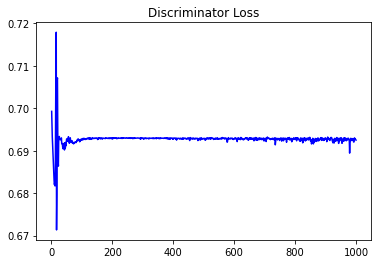

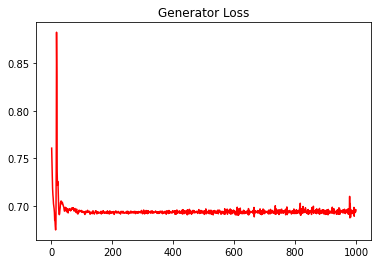

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0037979217878312075


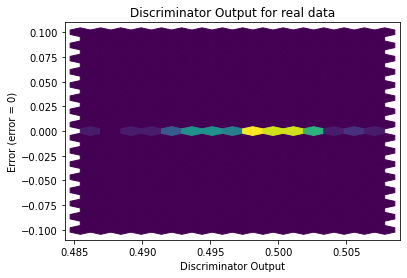

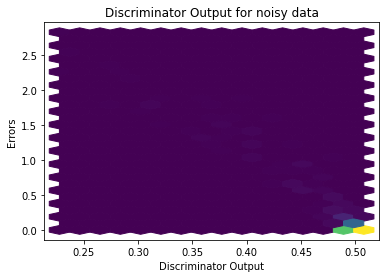

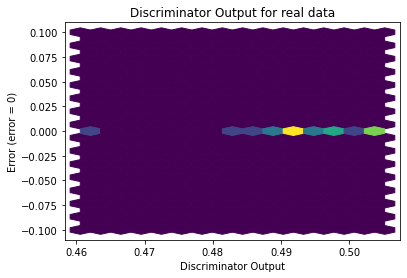

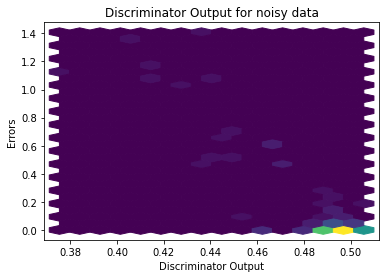

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


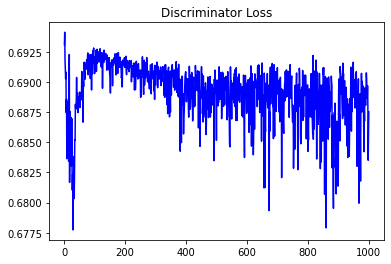

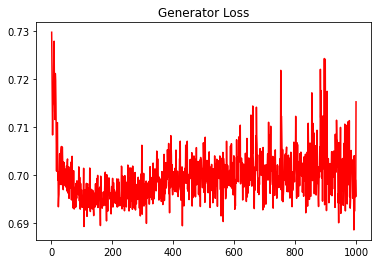

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.003219287913453565


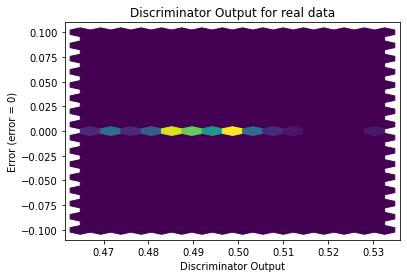

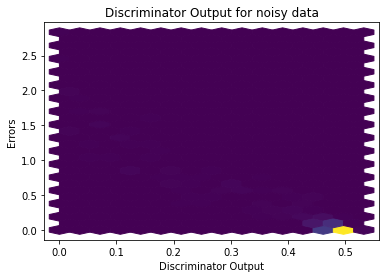

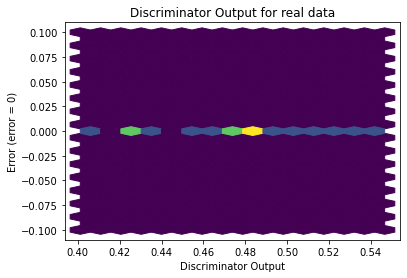

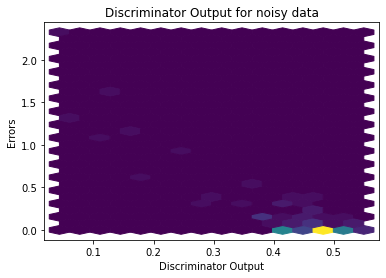

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1245]], requires_grad=True)
